In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [94]:
dataset = pd.read_csv('iphone_purchase_records.csv')
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [95]:
dataset.drop('Gender',axis = 1, inplace = True)

In [96]:
dataset.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [98]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [99]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [100]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [101]:
train,test = train_test_split(dataset, test_size = .3 , random_state = 42)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y='Purchase Iphone')

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[72  1]
 [ 8 39]]
0.896551724137931


0.925


Text(0.5, 1.0, 'Naive Bayes Results')

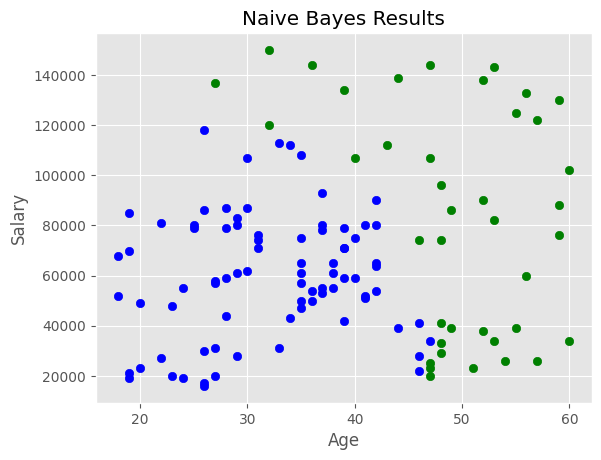

In [102]:
Y_pred = naive_bayes_gaussian(train, X=X_test, Y='Purchase Iphone')
print(accuracy_score(Y_test,Y_pred))

for i in range(len(Y_pred)):
    if(Y_pred[i]==0):
        plt.scatter(X_test[i][:1], X_test[i][1:2], color = 'blue')
    if(Y_pred[i]==1):
        plt.scatter(X_test[i][:1], X_test[i][1:2], color = 'green')

plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Naive Bayes Results')

In [103]:
testing = test.iloc[:,:-1]

<AxesSubplot: xlabel='Age', ylabel='Salary'>

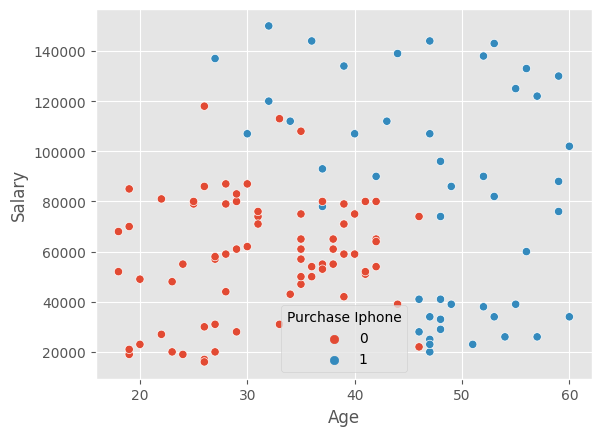

In [104]:
sns.scatterplot(data=dataset, x = testing['Age'], y = testing['Salary'], hue= 'Purchase Iphone')